## Importing the libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 

## Importing the dataset

In [18]:
df = pd.read_csv('spam.csv', encoding = 'latin-1', usecols=['v1', 'v2'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Preprocessing

In [19]:
df.columns = ['Category', 'Email']
df.sample()

,Category,Email
3159,ham,How much did ur hdd casing cost.


In [20]:
df['Spam'] = df['Category'].map({
    'ham' : 0,
    'spam' : 1
 })
df.sample(3)

,Category,Email,Spam
2507,ham,Yup...,0
5143,ham,Hi darlin im on helens fone im gonna b up the ...,0
2567,ham,I dont want to hear anything,0


In [21]:
X = df['Email']
y = df['Spam'].values

## Splitting the dataset into the Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 48)

## Model Training

In [23]:
MAX_VOCABULARY_SIZE = 20000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = MAX_VOCABULARY_SIZE)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [24]:
word2idx = tokenizer.word_index
V = len(word2idx)
print(f'Found {V} unique tokens.')

Found 7248 unique tokens.


In [25]:
data_train = tf.keras.preprocessing.sequence.pad_sequences(sequences_train)
print('Shape of data train tensor: ', data_train.shape)

T = data_train.shape[1]

Shape of data train tensor:  (3733, 121)


In [26]:
data_test = tf.keras.preprocessing.sequence.pad_sequences(sequences_test, maxlen = T)
print('Shape of data train tensor: ', data_test.shape)

Shape of data train tensor:  (1839, 121)


In [27]:
# Embedding Dimensionality
D =20

# Hidden State Dimensinality
M = 15

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=V+1, output_dim=D, input_length=T),
    tf.keras.layers.LSTM(M, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


In [34]:
# Complie 
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit
print('Training Data.....')
r = model.fit(data_train, y_train, epochs = 10, validation_data = (data_test, y_test))

Training Data.....
Epoch 1/10
117/117 [==============================] - 14s 70ms/step - loss: 0.4390 - accuracy: 0.8674 - val_loss: 0.3902 - val_accuracy: 0.8630
Epoch 2/10
117/117 [==============================] - 6s 49ms/step - loss: 0.3377 - accuracy: 0.8674 - val_loss: 0.3007 - val_accuracy: 0.8630
Epoch 3/10
117/117 [==============================] - 8s 71ms/step - loss: 0.2423 - accuracy: 0.8674 - val_loss: 0.2192 - val_accuracy: 0.8630
Epoch 4/10
117/117 [==============================] - 6s 50ms/step - loss: 0.1742 - accuracy: 0.9220 - val_loss: 0.1670 - val_accuracy: 0.9625
Epoch 5/10
117/117 [==============================] - 10s 83ms/step - loss: 0.1124 - accuracy: 0.9912 - val_loss: 0.1154 - val_accuracy: 0.9750
Epoch 6/10
117/117 [==============================] - 6s 52ms/step - loss: 0.0666 - accuracy: 0.9941 - val_loss: 0.0845 - val_accuracy: 0.9799
Epoch 7/10
117/117 [==============================] - 8s 68ms/step - loss: 0.0437 - accuracy: 0.9960 - val_loss: 0.0740 -

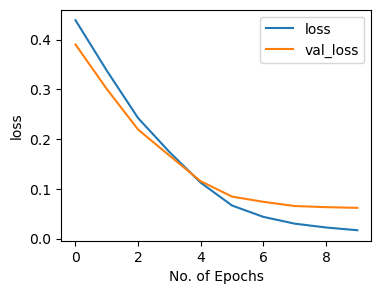

In [60]:
plt.figure(figsize= (4,3))

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.xlabel('No. of Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

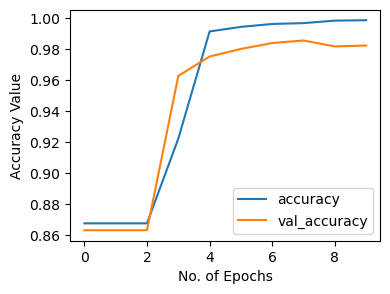

In [61]:
plt.figure(figsize= (4,3))

plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

## Prediction on single data

In [62]:
"""Eaxmple :
Subject: Exclusive Offer - Claim Your Prize Now!

Dear Sinchana,

Congratulations! You have been selected as the lucky winner of our exclusive promotion. You have won a brand new [Fictional Product] and a cash prize of $10,000! To claim your rewards, click on the link below:

http://example.com/offer

Act fast! This is a limited-time offer, and you don't want to miss out on your winnings.

Best regards,
VCompany
""" 

while True:
    curr_input = input()
    if curr_input == 'quit':
        break
    # Tokenize the input string
    tokenized_input = tokenizer.texts_to_sequences([curr_input])

    # Adjusting according to your specific model's input shape
    tokenized_input = tf.keras.preprocessing.sequence.pad_sequences(tokenized_input, maxlen=T, padding='post')

    # Perform prediction
    pred = model.predict(tokenized_input, verbose=False)[0][0]
    
    if pred > 0.5 :
        print("Email is Spam.")
    else:
        print("Email is not Spam.")
    print()

Email is Spam.

